<a href="https://colab.research.google.com/github/Hamza-Ali0237/MNIST-Classification-TensorFlow-Keras/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

# Load The Dataset

In [2]:
data_mnist = mnist.load_data()

In [3]:
print(data_mnist)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

# Split The Dataset

In [4]:
(X_train, y_train), (X_test, y_test) = data_mnist

### One-hot Encode Target Variable

In [5]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, 10)

### Split The Data Into Training, Validation, And Test

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Data Preprocessing

### Reshape The Data

In [7]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_val = X_val.reshape((X_val.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

### Normalize The Data

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)

print("Shape of X_val: ", X_val.shape)
print("Shape of y_val: ", y_val.shape)

print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (43200, 784)
Shape of y_train:  (43200, 10)
Shape of X_val:  (12000, 784)
Shape of y_val:  (12000, 10)
Shape of X_test:  (4800, 784)
Shape of y_test:  (4800, 10)


# Create Baseline Model

In [10]:
def create_base_model(input_shape = 28*28):
  model = Sequential()
  model.add(Dense(32, activation='relu', input_dim = input_shape))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return (model)

In [11]:
# Create Base Model
base_model = create_base_model()

# Compile The Base Model
base_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

# Print Model Summary
base_model_summary = base_model.summary()
print(base_model_summary)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 27882 (108.91 KB)
Trainable params: 27882 (108.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [12]:
hist_base_model = base_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
1350/1350 [==============================] - 15s 6ms/step - loss: 0.3718 - accuracy: 0.8921 - val_loss: 31.4469 - val_accuracy: 0.9313
Epoch 2/20
1350/1350 [==============================] - 6s 4ms/step - loss: 0.1833 - accuracy: 0.9452 - val_loss: 23.4680 - val_accuracy: 0.9485
Epoch 3/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.1421 - accuracy: 0.9574 - val_loss: 26.3886 - val_accuracy: 0.9473
Epoch 4/20
1350/1350 [==============================] - 7s 5ms/step - loss: 0.1159 - accuracy: 0.9646 - val_loss: 24.1735 - val_accuracy: 0.9528
Epoch 5/20
1350/1350 [==============================] - 7s 5ms/step - loss: 0.1000 - accuracy: 0.9691 - val_loss: 20.4265 - val_accuracy: 0.9645
Epoch 6/20
1350/1350 [==============================] - 5s 3ms/step - loss: 0.0853 - accuracy: 0.9732 - val_loss: 19.9312 - val_accuracy: 0.9644
Epoch 7/20
1350/1350 [==============================] - 6s 4ms/step - loss: 0.0751 - accuracy: 0.9759 - val_loss: 21.8313 - val_a

### Plot Learning Curves

In [13]:
def plot_learning_curves(history):
    # Extracting accuracy and loss values from the history
    accuracy = history.history['accuracy']
    loss = history.history['loss']

    # Extracting validation accuracy and validation loss values if available
    if 'val_accuracy' in history.history:
        val_accuracy = history.history['val_accuracy']
        val_loss = history.history['val_loss']

    # Plotting accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Training Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(val_accuracy, label='Validation Accuracy')
        plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(val_loss, label='Validation Loss')
        plt.legend()
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

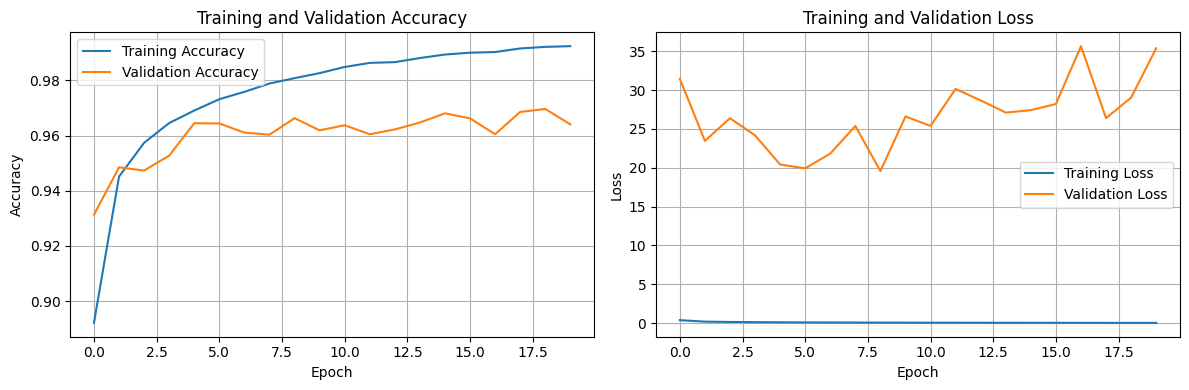

In [14]:
plot_learning_curves(hist_base_model)

The seems to be underfitting.